# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Iqbal Pahlevi Amin
- **Email:** m010d4ky2540@bangkit.academy
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- What day is the most popular day (weekday) for casual users?
- What day is the most popular day (weekday) for registered users?

## Import Semua Packages/Library yang Digunakan

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data

In [12]:
day = pd.read_csv('./data/day.csv')
day.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [13]:
hour = pd.read_csv('./data/hour.csv')
hour.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


### Assessing Data

In [14]:
# check for missing values
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [15]:
# check for missing values
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

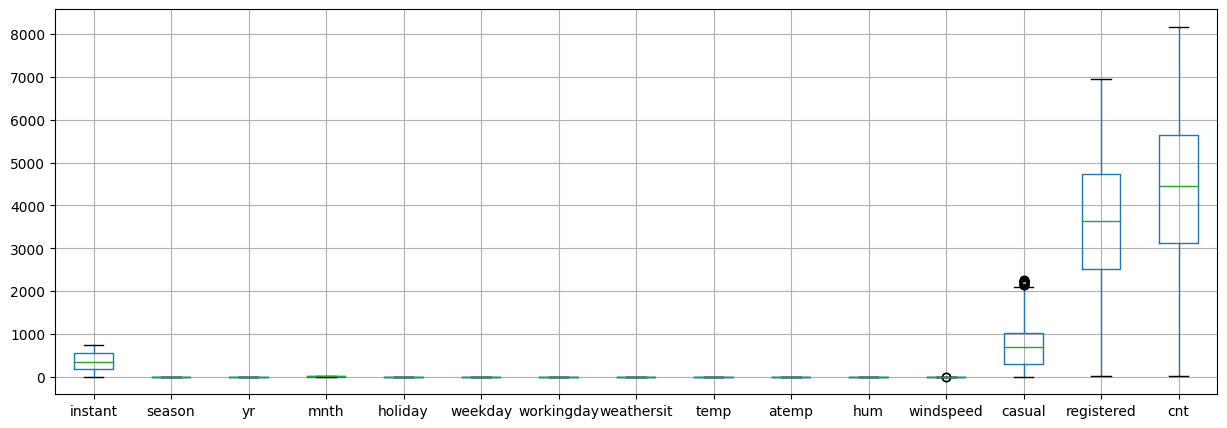

In [26]:
# check outliers using box plot for day dataset
plt.figure(figsize=(15, 5))
day.boxplot()
plt.show()

> insight: as you can see, there are several columns that contains outliers based on the box plot visualization. That's why we need to clean the data by dropping the outliers.

### Cleaning Data

In [17]:
# Drop Outliers
def remove_outliers(df):
    # Calculate the IQR for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Drop the rows containing outliers for all columns
    df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    return df

print(f"day shape before removing outliers: {day.shape}")
day = remove_outliers(day)
print(f"day shape after removing outliers: {day.shape}")

print(f"hour shape before removing outliers: {hour.shape}")
hour = remove_outliers(hour)
print(f"hour shape after removing outliers: {hour.shape}")


day shape before removing outliers: (731, 16)
day shape after removing outliers: (655, 16)
hour shape before removing outliers: (17379, 17)
hour shape after removing outliers: (14799, 17)


## Exploratory Data Analysis (EDA)

## Exploration

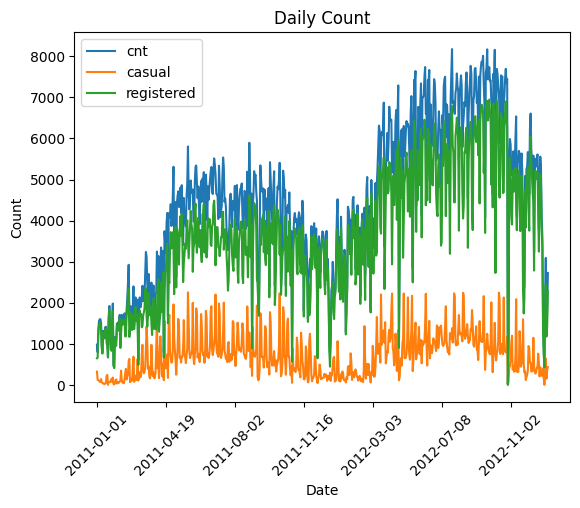

In [24]:
day.plot(x='dteday', y=['cnt', 'casual', 'registered'], kind='line')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Daily Count')
plt.show()

> insight: as you can see from the visualization above, the registered users is outnumbered the casual users. This is interesting because the casual users are the one who rent the bike without being registered. This means that the registered users are the one who rent the bike more often than the casual users. 

## Visualization & Explanatory Analysis

### Pertanyaan 1:

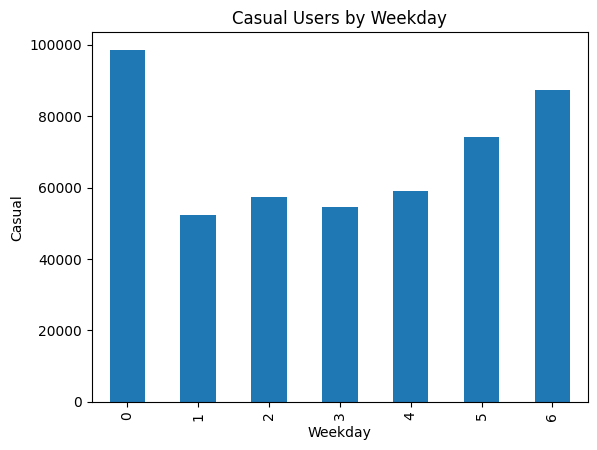

In [20]:
day_grouped = day.groupby('weekday')
casual_by_weekday = day_grouped['casual'].sum()

casual_by_weekday.plot(kind='bar')
plt.xlabel('Weekday')
plt.ylabel('Casual')
plt.title('Casual Users by Weekday')
plt.show()


> as you can see from the visualization above, the most popular day for casual users is Sunday (0). This is interesting because it means that the casual users rent the bike more often on Sunday.

### Pertanyaan 2:

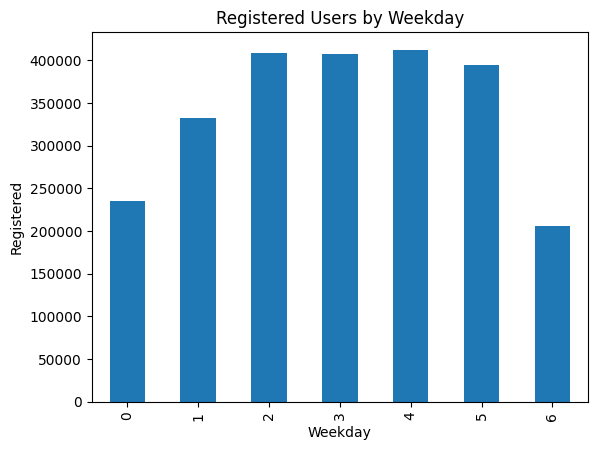

In [21]:
day_grouped = day.groupby('weekday')
registered_by_weekday = day_grouped['registered'].sum()

registered_by_weekday.plot(kind='bar')
plt.xlabel('Weekday')
plt.ylabel('Registered')
plt.title('Registered Users by Weekday')
plt.show()


> as you can see from the visualization above, the most popular day for registered users is Thursday (4). This is interesting because it means that the registered users rent the bike more often on Thursday.

## Conclusion

- The most popular day for casual users is Sunday (0).
- The most popular day for registered users is Thursday (4).